# Predicting the Emotion of tweet using NLP

## Problem Description
You have received a dataset of Twitter posts (tweets) labelled with specific
emotions. Your task is to develop an emotion detection model using natural
language processing (NLP) techniques. The goal is to accurately classify tweets into
different emotion categories such as joy, sadness, anger, fear, or surprise.

## Data

In [3]:
# importing the necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# loading the data into pandas data frame
df = pd.read_csv('tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
# evaluating the shape of the dataset
df.shape

(40000, 3)

We understood that, the given dataset has 3 columns
1. `tweet_id` : an identifier for the tweet
2. `sentiment` : Describes the emotion of the tweet
3. `content` : Defines the content of the tweet.

apart from this we understood that the given data has `40000` rows.

In [6]:
# checking for null values
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

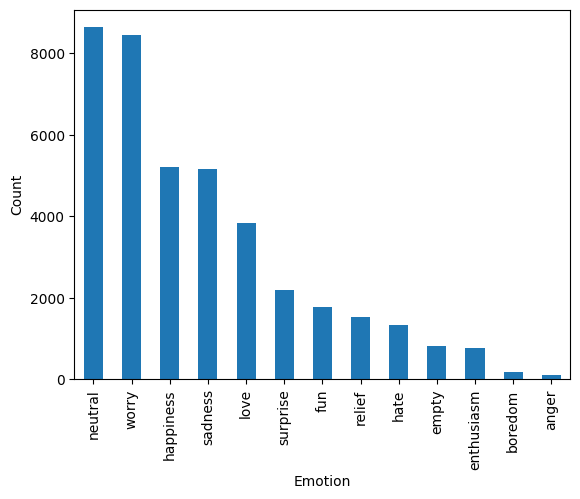

In [7]:
# Visualising the count of emotions in the sentiment column
df.sentiment.value_counts().plot(kind='bar', xlabel='Emotion', ylabel='Count')
plt.show()

In [8]:
# Preprocessing the data
#Preprocessing
import string
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
def remove_punctuation_of_text(text):
  punctuation_free = ''.join([i for i in text if i not in string.punctuation])
  #replacing links with empty string using regex
  no_links = re.sub(r'http\S+','',punctuation_free)
  return no_links

nltk.download('punkt')
def tokenization(text):
  tokens = nltk.word_tokenize(text)
  return tokens

nltk.download('stopwords')
stop_words= nltk.corpus.stopwords.words('english')
def remove_stop_words(text):
  no_stop_words = [i for i in text if i not in stop_words]
  return no_stop_words

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
def lemmatized_text(text):
  lemma = [wordnet_lem.lemmatize(word) for word in text]
  return lemma


def preprocess(column):
  corpus = []
  for item in column:
    new_item = remove_punctuation_of_text(item)
    new_item = new_item.lower()
    new_item = tokenization(new_item)
    new_item = remove_stop_words(new_item)
    new_item = lemmatized_text(new_item)
    corpus.append(new_item)
  return corpus

#Dropping the id column
# data.drop('id', axis=1, inplace = True)

#Adding the preprocessed text as a new column to the data df
df['processed'] = preprocess(df['content'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df.head()

,tweet_id,sentiment,content,processed
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[tiffanylue, know, listenin, bad, habit, earli..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[dannycastillo, want, trade, someone, houston,..."


In [10]:
# Label encoding sentiment column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df.head()


,tweet_id,sentiment,content,processed
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,"[tiffanylue, know, listenin, bad, habit, earli..."
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,10,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,3,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,8,@dannycastillo We want to trade with someone w...,"[dannycastillo, want, trade, someone, houston,..."


In [11]:
#decoding the encoded sentiment column
# df['sentiment'] = le.inverse_transform(df['sentiment'])
# df.head()

In [12]:
df.sentiment.value_counts()

8     8638
12    8459
5     5209
10    5165
7     3842
11    2187
4     1776
9     1526
6     1323
2      827
3      759
1      179
0      110
Name: sentiment, dtype: int64

In [13]:
# Dropping the tweet_id column
df.drop('tweet_id', axis=1, inplace = True)

In [14]:
df.head()

,sentiment,content,processed
0,2,@tiffanylue i know i was listenin to bad habi...,"[tiffanylue, know, listenin, bad, habit, earli..."
1,10,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,10,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,3,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,8,@dannycastillo We want to trade with someone w...,"[dannycastillo, want, trade, someone, houston,..."


In [15]:
# Splitting the df to x and y
x = df['processed']
y = df['sentiment']

In [16]:
# splitting the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### CBOW Model

In [17]:
import gensim
# creating Word2Vec model
word2vec_model = gensim.models.Word2Vec(x_train, min_count=1)

#assigning the words to word variable from the word2vec
words = word2vec_model.wv.index_to_key

#assigning the vectors for each word in the train and test set
train_vec = np.array([np.array(word2vec_model.wv[i] for i in item if i in words) for item in x_train], dtype=object)
test_vec = np.array([np.array(word2vec_model.wv[i] for i in item if i in words) for item in x_test], dtype=object)

#assigning a zero vector for words that are not in the word2vec vector and taking the mean for words that are in word2vec
#applying the same process for training and testing data



In [18]:
train_vec.ndim

1

In [19]:
x_train_vec_avg = [np.mean(v, axis=0) if v.ndim > 0 and v.size > 0 else np.zeros(100, dtype=float) for v in train_vec]
x_test_vec_avg = [np.mean(v, axis=0) if v.ndim > 0 and v.size > 0 else np.zeros(100, dtype=float) for v in test_vec]


using RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train_vec_avg, y_train)

RandomForestClassifier()

In [21]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test_vec_avg)
accuracy_score(y_pred,y_test)

0.2175

We got an accuracy of 21.75%

### LSTM

In [22]:
#decoding the encoded sentiment column
# df['sentiment'] = le.inverse_transform(df['sentiment'])
# df.head()

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00


In [25]:
import unidecode
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

additional preprocessing step to work for keras

In [26]:
def clean_text(text):
    #Removing URLs
    text = re.sub('((www.[^s]+)|(https?:\/\/.*?[\s+]))',' ', text)
    #Removing mentions
    text = re.sub('@[\w]*',' ', text)

    # Remove special characters and numbers
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r',+', ', ', text)
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    text = unidecode.unidecode(text)  # removing accents
    return text

def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

lemmatizer = WordNetLemmatizer()
def simple_lemmatizer(text):
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [27]:
df['content_clean'] = df['content'].apply(clean_text)
df['content_clean'] = df['content_clean'].apply(remove_stopwords)   # removing stopwords
df['content_clean'] = df['content_clean'].apply(simple_lemmatizer)  #

In [28]:
df.head()

,sentiment,content,processed,content_clean
0,2,@tiffanylue i know i was listenin to bad habi...,"[tiffanylue, know, listenin, bad, habit, earli...",know listenin bad habit earlier started freaki...
1,10,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]",layin n bed headache ughhhh waitin call
2,10,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]",funeral ceremony gloomy friday
3,3,wants to hang out with friends SOON!,"[want, hang, friend, soon]",want hang friend soon
4,8,@dannycastillo We want to trade with someone w...,"[dannycastillo, want, trade, someone, houston,...",want trade someone houston ticket one


### Feature Extraction

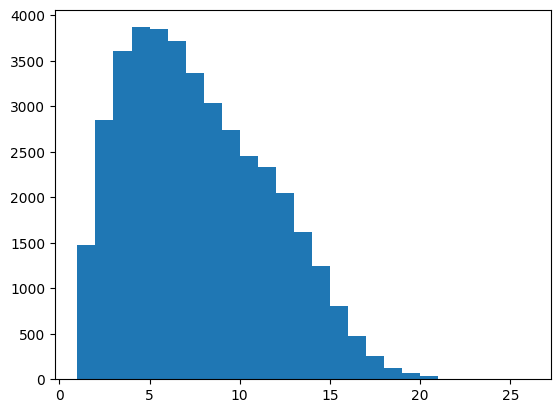

In [29]:

lengths = [len(t.split(' ')) for t in df['content_clean']]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()


The appropriate max words per sentence seems to be 20

In [30]:
maxlen = 20
vocab_size = 30000  # total number of word count was found to be just above 30000


In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="")   # initialize tokenizer with an out of vocabulary token
tokenizer.fit_on_texts(df['content_clean'])                      # fit on the cleaned tweets data

word_index = tokenizer.word_index
vocab_size = len(word_index)


In [32]:
def get_seqeuences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)                  # converting each sentence to tokenized numeric sequences
  padded = pad_sequences(sequences, truncating="post", padding="post", maxlen=maxlen) # post padding- fill with zeroes to the end & post truncate would truncate larger than maxlen at the end
  return padded

In [33]:
padded_tweets = get_seqeuences(tokenizer, df['content_clean'])

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_tweets, df['sentiment'], test_size=0.2, random_state=134) #splitting train and test data with 80:20 ratio


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, GlobalAveragePooling1D, Flatten, Dropout
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


Bidirectional LSTM Architecture with softmax activated output layer for multiclass classification

In [36]:
# number of classess for output
emotion_count = df['sentiment'].nunique()

In [37]:
model = Sequential()  # model with layers added sequentially
model.add(Embedding(vocab_size, 16, input_length = maxlen, embeddings_regularizer=l2(0.01)))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(32, activation = "relu", kernel_regularizer=l2(0.02)))
model.add(Dropout(0.5))      # dropout layer to prevent overfitting
model.add(Dense(emotion_count, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            481712    
                                                                 
 bidirectional (Bidirection  (None, 20, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 32)                1312      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 13)                4

Compiling with sparse categorical crossentropy because outputs are label encoded, evaluation policy is accuracy and optimizer is Adam. Also added an early stopping callback to prevent overfitting and also return best results

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)])


Epoch 1/50
1000/1000 [==============================] - 18s 11ms/step - loss: 2.3559 - accuracy: 0.2132 - val_loss: 2.1592 - val_accuracy: 0.2506
Epoch 2/50
1000/1000 [==============================] - 9s 9ms/step - loss: 2.1711 - accuracy: 0.2347 - val_loss: 2.1457 - val_accuracy: 0.2498
Epoch 3/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.1701 - accuracy: 0.2430 - val_loss: 2.1416 - val_accuracy: 0.2545
Epoch 4/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.1751 - accuracy: 0.2472 - val_loss: 2.1546 - val_accuracy: 0.2321
Epoch 5/50
1000/1000 [==============================] - 8s 8ms/step - loss: 2.1603 - accuracy: 0.2457 - val_loss: 2.1217 - val_accuracy: 0.2646
Epoch 6/50
1000/1000 [==============================] - 9s 9ms/step - loss: 2.1357 - accuracy: 0.2699 - val_loss: 2.0957 - val_accuracy: 0.3024
Epoch 7/50
1000/1000 [==============================] - 9s 9ms/step - loss: 2.1168 - accuracy: 0.2885 - val_loss: 2.0639 - val_accurac

In [39]:
score = model.evaluate(x_test, y_test)[1]
print("Accuracy score in percentage : " + str(round(score * 100, 2)) + "%")


250/250 [==============================] - 1s 4ms/step - loss: 2.0259 - accuracy: 0.3474
Accuracy score in percentage : 34.74%


We have got an accuracy of 34.74% from LSTM